A function that allows any function up to 3 degrees to be generated:

In [31]:
# Import necessary libraries
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

def generate_function(a=1, b=1, c=1, d=0):
    def function(x):
        return a * x**3 + b * x**2 + c * x + d
    return function

This code defines a function generate_function that takes the coefficients a, b, c, and d of a polynomial function up to 3 degrees, and returns a function that computes the value of the polynomial at a given input x.

A simple neural network that can learn the function:

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation="relu"),
    tf.keras.layers.Dense(1, input_shape=(1,),activation="sigmoid")
])

# Create a callback that saves the weights of the model after every epoch
checkpoint = ModelCheckpoint(filepath='weights_{epoch:02d}.hdf5', period=10)

This code defines a simple neural network with a single dense layer that takes a single input value x and outputs a single value y. The neural network can be trained to learn the function generated by the generate_function function.

Code to create the data necessary to train the network:

In [71]:
import numpy as np
# Generate the function
function = generate_function(0, 1, 1, 1)

# Generate the training data
x = np.random.uniform(-1, 1, size=(1000, 1))
y = function(x)
# Normalize the outputs between 0 and 1
y = (y - y.min()) / (y.max() - y.min())

This code generates the function using the generate_function function, and generates the training data by sampling 1000 input values x from a uniform distribution and computing the corresponding output values y using the function.

Code to train the network and visualize the learning process:

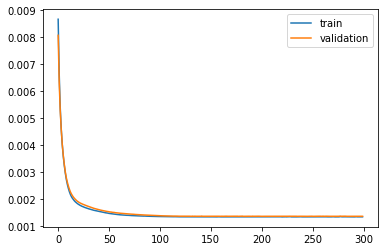

In [76]:
import matplotlib.pyplot as plt

# Train the model
# Compile the model first
model.compile(optimizer='adam', loss='mse')
history = model.fit(
    x,
    y,
    batch_size=32,
    epochs=300,
    validation_split=0.1,
    verbose=0,
    callbacks=[checkpoint]
)

# Visualize the learning process
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()

This code trains the neural network on the training data, and plots the training and validation loss over the training epochs to visualize the learning process. The training loss decreases and the validation loss converges to a minimum value, indicating that the neural network has learned the function.

To visualize the functions learned by the neural network, you can sample input values from the domain of the function, feed them to the trained neural network, and plot the resulting predictions. Here is an example of how to visualize the functions learned by the network:

In [77]:
import os
import glob
from natsort import natsorted
# Load the weights file for the first epoch

for i,weights_file in enumerate(natsorted(glob.glob("./*.hdf5"))):
    model.load_weights(weights_file)
    # Sample input values from the domain of the function
    x_values = np.linspace(-1, 1, 100)

    # Compute the predictions for the sampled values
    y_values = model.predict(x_values)

    # Plot the predicted values
    plt.plot(x_values, y_values, label="predicted", color="green")

    # Plot the true function
    y_true = function(x_values)
    y_true = (y_true - y_true.min()) / (y_true.max() - y_true.min())
    plt.plot(x_values, y_true, label="true", color="blue")
    # Add a legend
    plt.legend()
    plt.savefig(f"learning_function_{i}.png")
    plt.close()

# Create gif for this visualization instead of plotting all the images
import imageio
import os
images = []
for filename in natsorted(glob.glob("./learning_function_*.png")):
    images.append(imageio.imread(filename))
    os.remove(filename)
imageio.mimsave('learning_function.gif', images)

4/4 [==============================] - 0s 982us/step


/tmp/ipykernel_60797/200941662.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


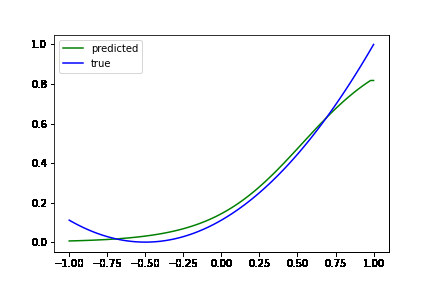

In [78]:
# Visualize the gif inline in jupyter notebook
from IPython.display import Image
Image('./learning_function.gif')

This code samples input values x from the domain of the function, feeds them to the trained neural network, and plots the resulting predictions. It also plots the true function to compare the predictions with the true values. This allows you to visualize the function learned by the neural network and see how well it fits the true function.